Value Screening using JMP for Feature Engineering

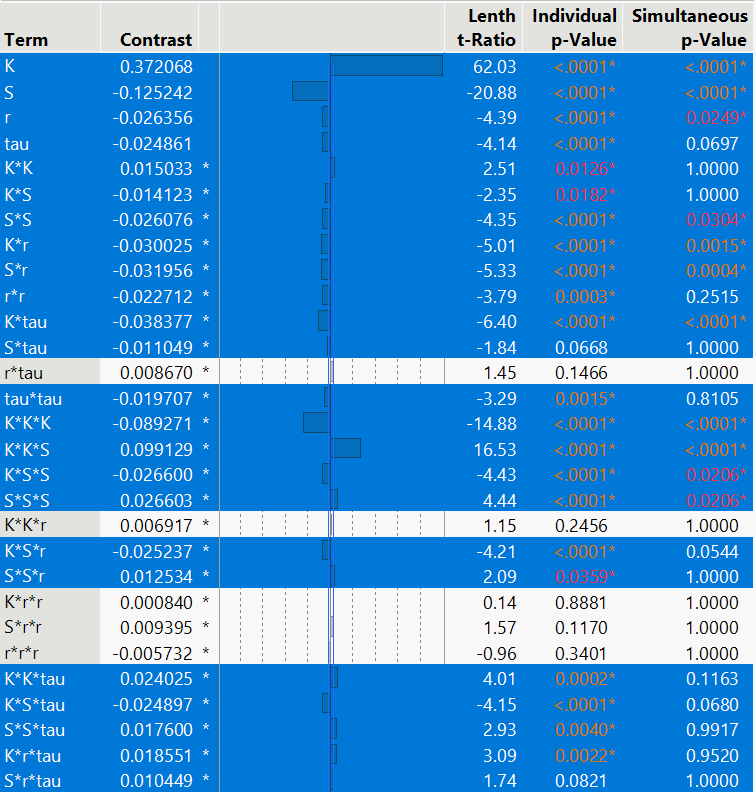

# DSO 530 Group Project Classification

- Please provide comments for every seciton of code
- Add your name as a comment at the top of every code cell
- Please do not overwrite anyone's code, if required create a new cell and edit someone else's code

Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
# Reading data
data_df = pd.read_csv('option_train.csv')
data_copy = data_df.copy()

In [3]:
print(data_df.info())
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1679 non-null   float64
 1   S       1679 non-null   float64
 2   K       1678 non-null   float64
 3   tau     1679 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(5), object(1)
memory usage: 78.9+ KB
None


,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


# Data Cleaning

In [4]:
# Dropping rows with missing values
print(f'Number of records before dropping blank data: {data_df.shape[0]}')
pre = data_df.shape[0]
data_df.dropna(inplace = True)
print(f'Number of records after dropping blank data: {data_df.shape[0]}')
print(f'Number of records dropped: {pre - data_df.shape[0]}')

Number of records before dropping blank data: 1680
Number of records after dropping blank data: 1678
Number of records dropped: 2


In [5]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1678 non-null   float64
 1   S       1678 non-null   float64
 2   K       1678 non-null   float64
 3   tau     1678 non-null   float64
 4   r       1678 non-null   float64
 5   BS      1678 non-null   object 
dtypes: float64(5), object(1)
memory usage: 91.8+ KB
None


# Data Preparation

In [6]:
# Converting BS from a categorical field to a numeric field
data_df['BS'].replace(['Under', 'Over'], [0, 1], inplace=True)
data_df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0


# Feature Engineering

In [7]:
# Creating additional features
data_df2 = data_df.copy()
cols = list(data_df2.columns[1:5])

for i in range(len(cols)):
  for j in range(i,len(cols)):
    data_df2[cols[i]+'*'+cols[j]] = data_df2[cols[i]] * data_df2[cols[j]]

temp = data_df2.pop('BS')
data_df2.insert(1, 'BS', temp)

print(data_df2.columns)
data_df2.head()

Index(['Value', 'BS', 'S', 'K', 'tau', 'r', 'S*S', 'S*K', 'S*tau', 'S*r',
       'K*K', 'K*tau', 'K*r', 'tau*tau', 'tau*r', 'r*r'],
      dtype='object')


,Value,BS,S,K,tau,r,S*S,S*K,S*tau,S*r,K*K,K*tau,K*r,tau*tau,tau*r,r*r
0,21.670404,0,431.623898,420.0,0.341270,0.03013,186299.189584,181282.037286,147.300219,13.004828,176400.0,143.333333,12.6546,0.116465,0.010282,0.000908
1,0.125000,1,427.015526,465.0,0.166667,0.03126,182342.259360,198562.219543,71.169254,13.348505,216225.0,77.500000,14.5359,0.027778,0.005210,0.000977
2,20.691244,0,427.762336,415.0,0.265873,0.03116,182980.616442,177521.369606,113.730463,13.329074,172225.0,110.337302,12.9314,0.070688,0.008285,0.000971
3,1.035002,1,451.711658,460.0,0.063492,0.02972,204043.421792,207787.362588,28.680105,13.424870,211600.0,29.206349,13.6712,0.004031,0.001887,0.000883
4,39.553020,0,446.718974,410.0,0.166667,0.02962,199557.842089,183154.779504,74.453163,13.231816,168100.0,68.333333,12.1442,0.027778,0.004937,0.000877


In [8]:
# data_df2.drop(['S*tau','K*K','tau*tau', 'tau*r', 'r*r'], axis=1, inplace=True)
# data_df2.head()

data_df2.drop(['S*S','S*K','S*tau','K*K','tau*tau', 'tau*r', 'r*r'], axis=1, inplace=True)
data_df2.head()


,Value,BS,S,K,tau,r,S*r,K*tau,K*r
0,21.670404,0,431.623898,420.0,0.341270,0.03013,13.004828,143.333333,12.6546
1,0.125000,1,427.015526,465.0,0.166667,0.03126,13.348505,77.500000,14.5359
2,20.691244,0,427.762336,415.0,0.265873,0.03116,13.329074,110.337302,12.9314
3,1.035002,1,451.711658,460.0,0.063492,0.02972,13.424870,29.206349,13.6712
4,39.553020,0,446.718974,410.0,0.166667,0.02962,13.231816,68.333333,12.1442


# Scaling of data

**Min Max Scaling (w/o additional features)**

In [9]:
df = data_df.iloc[:,1:5]

# Min max scaling
mms = MinMaxScaler()
df_norm = mms.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns = ['S','K','tau','r'])

print(df_norm.head(5))
print("\n")

          S     K       tau         r
0  0.946792  0.36  0.001349  0.261603
1  0.936683  0.72  0.000651  0.738397
2  0.938321  0.32  0.001048  0.696203
3  0.990855  0.68  0.000238  0.088608
4  0.979903  0.28  0.000651  0.046414




**Min Max Scaling (with additional features)**

In [10]:
df2 = data_df2.iloc[:,2:]

# Min max scaling
mms = MinMaxScaler()
df_norm2 = mms.fit_transform(df2)
# df_norm2 = pd.DataFrame(df_norm2, columns=['S', 'K', 'tau', 'r', 'S*S', 'S*K', 'S*r',
#         'K*tau', 'K*r'])

df_norm2 = pd.DataFrame(df_norm2, columns=['S', 'K', 'tau', 'r', 'S*r',
        'K*tau', 'K*r'])

print(df_norm2.head(5))
print("\n")

          S     K       tau         r       S*r     K*tau       K*r
0  0.946792  0.36  0.001349  0.261603  0.931861  0.001205  0.304100
1  0.936683  0.72  0.000651  0.738397  0.956487  0.000645  0.830220
2  0.938321  0.32  0.001048  0.696203  0.955095  0.000925  0.381509
3  0.990855  0.68  0.000238  0.088608  0.961959  0.000234  0.588400
4  0.979903  0.28  0.000651  0.046414  0.948126  0.000567  0.161362




# Models

Train Test Split (no additional features)

In [11]:
# Train test split for un-scaled data (no additional features)
X, y = data_df.iloc[:,1:5].values, data_df.iloc[:,-1].values

X_train, X_test, y_train, y_test = \
           train_test_split(X, y, train_size=0.8, random_state=123, stratify=y)


# Train test split for scaled data (no additional features)
X_norm, y_norm = df_norm.values, data_df.iloc[:,-1].values

X_train_norm, X_test_norm, y_train_norm, y_test_norm = \
           train_test_split(X_norm, y_norm, train_size=0.8, random_state=123, stratify=y_norm)

Train Test Split (WITH additional features)

In [12]:
# Train test split for un-scaled data (WITH additional features)
X2, y2 = data_df2.iloc[:,2:].values, data_df2.iloc[:,1].values

X_train2, X_test2, y_train2, y_test2 = \
           train_test_split(X2, y2, train_size=0.8, random_state=123, stratify=y2)


# Train test split for scaled data (WITH additional features)
X_norm2, y_norm2 = df_norm2.values, data_df2.iloc[:,1].values

X_train_norm2, X_test_norm2, y_train_norm2, y_test_norm2 = \
           train_test_split(X_norm2, y_norm2, train_size=0.8, random_state=123, stratify=y_norm2)

## Logistic Regression w/o scaled data (NO additional features)

In [ ]:
logit = LogisticRegression(penalty='none',max_iter=300).fit(X_train, y_train)

In [ ]:
logit.predict(X_test)[:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
logit.predict_proba(X_test)[:10]

array([[9.29334570e-01, 7.06654305e-02],
       [9.78300429e-02, 9.02169957e-01],
       [7.10409287e-03, 9.92895907e-01],
       [2.71294724e-02, 9.72870528e-01],
       [2.04608223e-01, 7.95391777e-01],
       [7.59952491e-02, 9.24004751e-01],
       [1.70504385e-01, 8.29495615e-01],
       [2.74735689e-04, 9.99725264e-01],
       [9.06154478e-01, 9.38455218e-02],
       [2.67710704e-02, 9.73228930e-01]])

In [ ]:
score = logit.score(X_test, y_test)
print(f'Accuracy Score: {round(score,4)}')

print(f'Classification error: {round(100 - (score*100) ,2)}%')

Accuracy Score: 0.9345
Classification error: 6.55%


## Logistic Regression with scaled data (NO additional features)

In [ ]:
# Logistic Regression with scaled data
logit_norm = LogisticRegression(penalty='none',max_iter=300).fit(X_train_norm, y_train_norm)   

logit_norm.predict(X_test_norm)[:10]

score_norm = logit_norm.score(X_test_norm, y_test_norm)

print("Logistic Regression")
print(f'Accuracy Score: {round(score_norm,4)}')
print(f'Classification error: {round(100 - (score_norm*100) ,2)}%')

Logistic Regression
Accuracy Score: 0.9345
Classification error: 6.55%


## Logistic Regression w/o scaled data (WITH additional features)

## Logistic Regression with scaled data (WITH additional features)

## K Nearest Neighbours w/o scaled data

In [ ]:
# Training the model for various values of k
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
  
    training_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
# Model Evaluation
print("k : Training Score       Test Score")
for keys, values in scores.items():
    print(keys, ':', values)

k : Training Score       Test Score
2 : [0.940387481371088, 0.9017857142857143]
3 : [0.9359165424739195, 0.9077380952380952]
4 : [0.9217585692995529, 0.9226190476190477]
5 : [0.9225037257824144, 0.9196428571428571]
6 : [0.9202682563338301, 0.9196428571428571]
7 : [0.9217585692995529, 0.9375]
8 : [0.9165424739195231, 0.9375]
9 : [0.9172876304023845, 0.9404761904761905]
10 : [0.9157973174366617, 0.9494047619047619]
11 : [0.9150521609538003, 0.9464285714285714]
12 : [0.9157973174366617, 0.9404761904761905]
13 : [0.9120715350223547, 0.9404761904761905]
14 : [0.9135618479880775, 0.9404761904761905]
15 : [0.912816691505216, 0.9345238095238095]
16 : [0.9150521609538003, 0.9375]
17 : [0.9143070044709389, 0.9315476190476191]
18 : [0.9157973174366617, 0.9315476190476191]
19 : [0.9135618479880775, 0.9315476190476191]
20 : [0.9113263785394933, 0.9285714285714286]


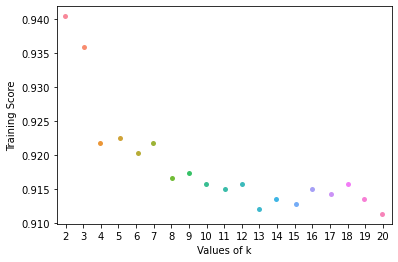

In [ ]:
# k vs train scores
ax = sns.stripplot(K, training);
ax.set(xlabel ='Values of k', ylabel ='Training Score')   
plt.show()

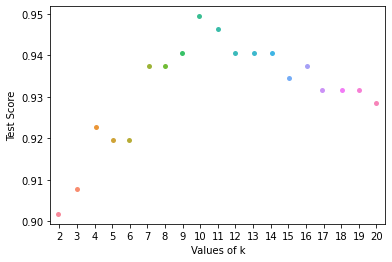

In [ ]:
# k vs test scores
ax = sns.stripplot(K, test);
ax.set(xlabel ='Values of k', ylabel ='Test Score')   
plt.show()

In [ ]:
# Therefore, choosing k=10 to fit the model
knnFinal = KNeighborsClassifier(n_neighbors = 10)
knnFinal.fit(X_train, y_train)
accScore = knnFinal.score(X_test, y_test)

In [ ]:
print(f'Accuracy Score: {round(accScore,4)}')

print(f'Classification error: {round(100 - (accScore*100) ,2)}%')

Accuracy Score: 0.9494
Classification error: 5.06%


##KNN with scaled data

In [ ]:
# KNN
knn_norm = KNeighborsClassifier(n_neighbors = 10)
knn_norm.fit(X_train_norm, y_train_norm)
accScore_norm = knn_norm.score(X_test_norm, y_test_norm)

print("KNN")
print(f'Accuracy Score: {round(accScore_norm,4)}')
print(f'Classification error: {round(100 - (accScore_norm*100) ,2)}%')

KNN
Accuracy Score: 0.9226
Classification error: 7.74%


## Decision Tree w/o scaled data

In [ ]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

In [ ]:
from sklearn import tree
plt.figure(figsize=(8, 8), dpi=80)
tree.plot_tree(clf)
plt.show()

In [ ]:
test_pred_decision_tree = clf.predict(X_test)

In [14]:
labels = data_copy['BS'].unique()

#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

NameError: ignored

In [ ]:
score_dt = metrics.accuracy_score(y_test, test_pred_decision_tree)

In [ ]:
print("Decision Tree")
print(f'Accuracy Score: {round(score_dt,4)}')

print(f'Classification error: {round(100 - (score_dt*100) ,2)}%')

## Decision Tree with scaled data

In [ ]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train_norm, y_train_norm)

test_pred_decision_tree_norm = clf.predict(X_test_norm)

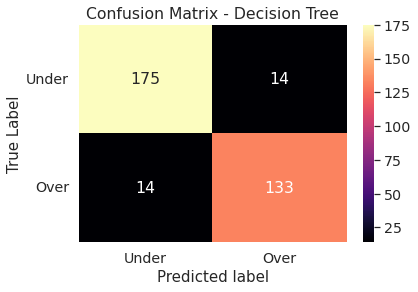

<Figure size 720x504 with 0 Axes>

In [ ]:
labels = data_copy['BS'].unique()

#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_norm,  
                                            test_pred_decision_tree_norm)
#turn this into a dataframe
matrix_df_norm = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df_norm, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [ ]:
score_dt_norm = metrics.accuracy_score(y_test_norm, test_pred_decision_tree_norm)

print(f'Accuracy Score: {round(score_dt_norm,4)}')

print(f'Classification error: {round(100 - (score_dt_norm*100) ,2)}%')

Accuracy Score: 0.9167
Classification error: 8.33%


## Random Forest Classifier w/o scaled data

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[181,   8],
       [ 10, 137]])

In [ ]:
score_rf = rf_model.score(X_test, y_test)

In [ ]:
print("Random Forest")
print(f'Accuracy Score: {round(score_rf,4)}')

print(f'Classification error: {round(100 - (score_rf*100) ,2)}%')

Random Forest
Accuracy Score: 0.9464
Classification error: 5.36%


## Random Forest Classifier w/o scaled data (WITH ADDITIONAL FEATURES)

In [ ]:
rf_model2 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_model2.fit(X_train2, y_train2)

y_pred_rf2 = rf_model2.predict(X_test2)

cm_rf2 = confusion_matrix(y_pred_rf2, y_test2)
print("Confusion Matrix")
print(cm_rf2)

score_rf2 = rf_model2.score(X_test2, y_test2)

print("---------------------")
print(f'Accuracy Score: {round(score_rf2,4)}')
print(f'Classification error: {round(100 - (score_rf2*100) ,2)}%')

Confusion Matrix
[[181   9]
 [  8 138]]
---------------------
Accuracy Score: 0.9494
Classification error: 5.06%


## Random Forest Classifier w/o scaled data, with Cross Validation

In [20]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv_model = GridSearchCV(rf,param_grid=param_grid,cv=10)
cv_model.fit(X_train, y_train)
cv_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [21]:
from sklearn.metrics import accuracy_score
cv_best_model = RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
cv_best_model.fit(X_train, y_train)
cv_y_pred = cv_best_model.predict(X_test)
cv_score = accuracy_score(cv_y_pred, y_test)

In [22]:
print("AFTER CROSS VALIDATION")
print(f'Accuracy Score: {round(cv_score,4)}')
print(f'Classification error: {round(100 - (cv_score*100) ,2)}%')

AFTER CROSS VALIDATION
Accuracy Score: 0.9554
Classification error: 4.46%


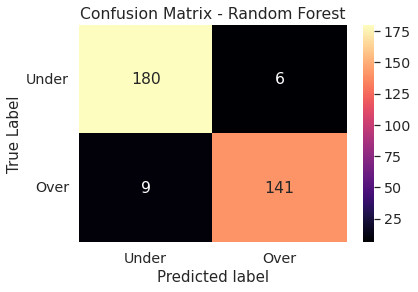

<Figure size 720x504 with 0 Axes>

In [24]:
labels = data_copy['BS'].unique()

#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(cv_y_pred,  
                                            y_test)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

## Random Forest Classifier w/o scaled data, with Cross Validation (WITH ADDITIONAL FEATURES)

In [ ]:
rf2 = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

cv_model2 = GridSearchCV(rf2,param_grid=param_grid,cv=10)
cv_model2.fit(X_train2, y_train2)

cv_model2.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
cv_best_model2 = RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
cv_best_model2.fit(X_train2, y_train2)
cv_y_pred2 = cv_best_model2.predict(X_test2)
cv_score2 = accuracy_score(cv_y_pred2, y_test2)

In [ ]:
print("AFTER CROSS VALIDATION")
print(f'Accuracy Score: {round(cv_score2,4)}')
print(f'Classification error: {round(100 - (cv_score2*100) ,2)}%')

AFTER CROSS VALIDATION
Accuracy Score: 0.9524
Classification error: 4.76%


## Random forest with scaled data

In [ ]:
rf_model_norm = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_model_norm.fit(X_train_norm, y_train_norm)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_rf_norm = rf_model_norm.predict(X_test_norm)

In [ ]:
cm_rf_norm = metrics.confusion_matrix(y_test_norm, y_pred_rf_norm)
cm_rf_norm

array([[181,   8],
       [ 10, 137]])

In [ ]:
score_rf_norm = rf_model_norm.score(X_test_norm, y_test_norm)

In [ ]:
print("Random Forest (With scaled data")
print(f'Accuracy Score: {round(score_rf_norm,4)}')

print(f'Classification error: {round(100 - (score_rf_norm*100) ,2)}%')

Random Forest (With scaled data
Accuracy Score: 0.9464
Classification error: 5.36%


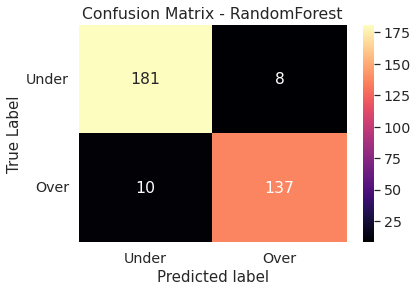

<Figure size 720x504 with 0 Axes>

In [ ]:
labels = data_copy['BS'].unique()

#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_norm,  
                                            y_pred_rf_norm)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - RandomForest')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

## Random forest with scaled data, with Cross Validation

In [ ]:
cv_model_norm = GridSearchCV(rf,param_grid=param_grid,cv=10)
cv_model_norm.fit(X_train_norm, y_train_norm)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
cv_model_norm.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
from sklearn.metrics import accuracy_score
cv_best_model_norm = RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
cv_best_model_norm.fit(X_train_norm, y_train_norm)
cv_y_pred_norm = cv_best_model_norm.predict(X_test_norm)
cv_score_norm = accuracy_score(cv_y_pred_norm, y_test_norm)

print("AFTER CROSS VALIDATION")
print(f'Accuracy Score: {round(cv_score,4)}')
print(f'Classification error: {round(100 - (cv_score*100) ,2)}%')

AFTER CROSS VALIDATION
Accuracy Score: 0.9554
Classification error: 4.46%


## Neural Networks w/o scaled data

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
#nn.predict_proba(X_test)

In [ ]:
nn.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
score_nn = nn.score(X_test, y_test)

print("Neural Network")
print(f'Accuracy Score: {round(score_nn,4)}')

print(f'Classification error: {round(100 - (score_nn*100) ,2)}%')

Neural Network
Accuracy Score: 0.9286
Classification error: 7.14%


##Neural Networks with scaled data

In [ ]:
nn_norm = MLPClassifier(random_state=1, max_iter=300).fit(X_train_norm, y_train_norm)

In [ ]:
#nn_norm.predict_proba(X_test_norm)

In [ ]:
nn_norm.predict(X_test_norm)

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
score_nn_norm = nn_norm.score(X_test_norm, y_test_norm)

print("Neural Network")
print(f'Accuracy Score: {round(score_nn_norm,4)}')

print(f'Classification error: {round(100 - (score_nn_norm*100) ,2)}%')

Neural Network
Accuracy Score: 0.9196
Classification error: 8.04%


## Using Cost Complexity Pruning for Decision Trees (scaled data)

PS: Gives the same result for both original and scaled data

In [ ]:
from sklearn.metrics import accuracy_score
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [ ]:
clf_tree = DecisionTreeClassifier(random_state=0)

In [ ]:
path = clf_tree.cost_complexity_pruning_path(X_train_norm, y_train_norm)
ccp_alphas = path.ccp_alphas

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfolds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

accuracies = []
for ccp_alpha in ccp_alphas:
  score_for_alpha = []
  for train_index, test_index in kfolds.split(X_train_norm, y_train_norm):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_norm[train_index], y_train_norm[train_index])
    y_pred = clf.predict(X_train_norm[test_index])
    score = accuracy_score(y_pred, y_train_norm[test_index])
    score_for_alpha.append(score)
  accuracies.append(sum(score_for_alpha)/len(score_for_alpha))

In [ ]:
print("The accuracies: ",accuracies)
print("\nThe index corresponding to the maximum of the accuracies: ",np.argmax(accuracies))

The accuracies:  [0.9053731343283582, 0.9053731343283582, 0.9061194029850747, 0.9061194029850747, 0.9061194029850747, 0.9061249309010503, 0.9061249309010503, 0.9053786622443338, 0.9053786622443338, 0.9053786622443338, 0.9053786622443338, 0.9053786622443338, 0.9046323935876174, 0.9046323935876174, 0.9053731343283582, 0.9053731343283582, 0.9053731343283582, 0.9053731343283582, 0.9068601437258155, 0.9068601437258155, 0.906113875069099, 0.906113875069099, 0.9061083471531234, 0.9053676064123826, 0.9053676064123826, 0.9053676064123826, 0.9053676064123826, 0.9053676064123826, 0.9053676064123826, 0.9053676064123826, 0.9046213377556661, 0.9046213377556661, 0.9046213377556661, 0.9038805970149255, 0.9023880597014926, 0.9023880597014926, 0.9009010503040354, 0.900889994472084, 0.900889994472084, 0.903869541182974, 0.8986401326699834, 0.8986401326699834, 0.8986511885019347, 0.8994140409065782, 0.8979159756771697, 0.8994085129906025, 0.9016252072968491, 0.9038916528468768, 0.9016528468767275, 0.90014

In [ ]:
 max_index = np.argmax(accuracies)
 # Use the selected alpha to retrain a tree on the entire (X_train,y_train)
alpha_cv = ccp_alphas[max_index]
clf_tree_final = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha_cv)
clf_tree_final.fit(X_train_norm, y_train_norm)
# Evaluate on the (X_test,y_test)
y_pred_test = clf_tree_final.predict(X_test_norm)
score_test = accuracy_score(y_test_norm, y_pred_test)
print(f'Accuracy Score: {round(score_test,4)}')

print(f'Classification error: {round(100 - (score_test*100) ,2)}%')

Accuracy Score: 0.9018
Classification error: 9.82%


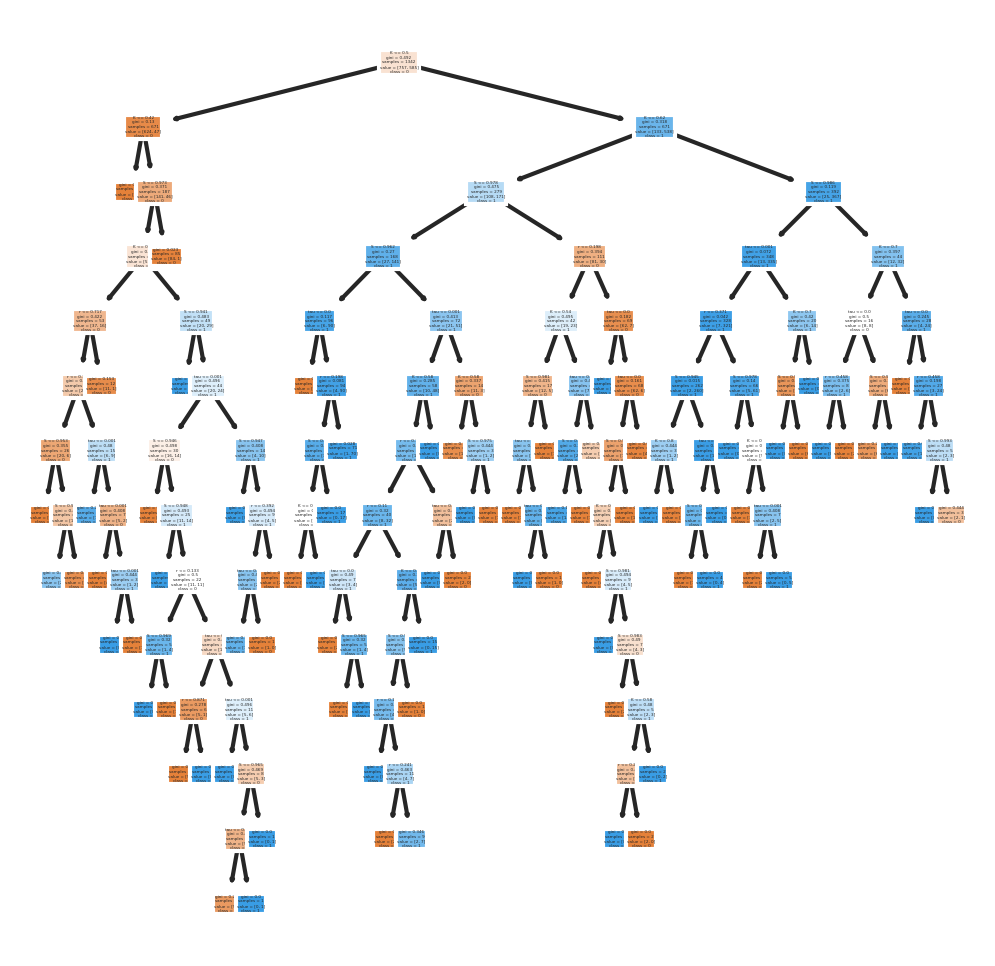

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
from sklearn import tree
tree.plot_tree(clf_tree_final, feature_names = ['S','K','tau','r'], class_names=['0','1'], filled = True);

References:

https://www.kaggle.com/code/soham15/k-cross-validation-and-classification-models/notebook


https://medium.com/the-rise-of-unbelievable/what-is-cross-validation-and-when-to-use-which-cross-validation-327d25bbb3f3

# Output File Generation

In [ ]:
#Reading test data
test_data = pd.read_csv('option_test_wolabel.csv')
print(test_data.info())
test_data.head()

In [ ]:
X_TESTDATA = test_data.values
X_TESTDATA

In [ ]:
# Using Random Forest Classifier w/o scaled data, with cross validation
TESTDATA_pred = cv_best_model.predict(X_TESTDATA)
TESTDATA_pred

In [ ]:
# To dataframe
prediction_df = pd.DataFrame(TESTDATA_pred, columns = ['predictions'])
prediction_df.head()

In [ ]:
prediction_df.to_csv('group_32_predictions_classification.csv')